In [1]:
from pathlib import Path
import os
compe='spaceship-titanic'
iskaggle= os.environ.get('KAGGLE_KERNEL_RUNTYPE','')
if iskaggle:
    path=Path(f'../input/{compe}')
    ! pip install -Uqq fastai
else:
    import kaggle,zipfile
    path=Path(f'{compe}')
    if not path.exists():
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f'{path}.zip').extractall(path)

In [2]:
from fastai.tabular.all import *

pd.options.display.float_format = '{:.2f}'.format
set_seed(42)

In [3]:
df=pd.read_csv('spaceship-titanic/train.csv')
df_test=pd.read_csv('spaceship-titanic/test.csv')

In [4]:
df.head(3)
print(df.shape)

(8693, 14)


In [5]:
cols=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
df['Extras']=df[cols].sum(axis=1)
df.drop(cols+['Name'], axis=1,inplace=True)

df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported,Extras
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,False,0.00
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,True,736.00
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,False,10383.00


In [32]:
df_test['Extras']=df_test[cols].sum(axis=1)
df_test.drop(cols+['Name'], axis=1,inplace=True)

df_test.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Extras
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00,False,0.00
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00,False,2832.00
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00,False,0.00


In [6]:
log_cols=['Age','Extras']
df[log_cols]=np.log1p(df[log_cols])
df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported,Extras
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,3.69,False,False,0.00
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,3.22,False,True,6.60
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,4.08,True,False,9.25


In [33]:
df_test[log_cols]=np.log1p(df_test[log_cols])
df_test.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Extras
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,3.33,False,0.00
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,3.00,False,7.95
2,0019_01,Europa,True,C/0/S,55 Cancri e,3.47,False,0.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  8693 non-null   object 
 1   HomePlanet   8492 non-null   object 
 2   CryoSleep    8476 non-null   object 
 3   Cabin        8494 non-null   object 
 4   Destination  8511 non-null   object 
 5   Age          8514 non-null   float64
 6   VIP          8490 non-null   object 
 7   Transported  8693 non-null   bool   
 8   Extras       8693 non-null   float64
dtypes: bool(1), float64(2), object(6)
memory usage: 551.9+ KB


In [8]:
df[df['Transported'] == True].Transported.count()/df.shape[0]

0.5036236051995858

In [9]:
df.isna().any(axis=1).sum()

1121

In [10]:
df_test=pd.read_csv('spaceship-titanic/test.csv')
df_sub=pd.read_csv('spaceship-titanic/sample_submission.csv')

In [11]:
import subprocess
def make_sub(pred_y,sub_data=df_test,name='default'):
    df_submission = pd.DataFrame()
    df_submission['PassengerId']=df_test['PassengerId']
    df_submission['Transported']=pred_y
    df_sub.to_csv(f'submission-{name}.csv', index=False)
    cmd =f'kaggle competitions submit -c {compe} -f submission-{name}.csv -m "Message"'
    subprocess.run(cmd, shell=True)
    print(f'succesully saved - {name}')


In [12]:
df_test.shape

(4277, 13)

  ***
  <font size="5">-> __Dumb model pridected 0.490__</font>
   ***

In [13]:
x=df_test.isna().any(axis=1).sum()
print('nan values in test',x)
print('Total size of df_test',df_test.shape)
print('nan% is ',x*100/df_test.shape[0])

nan values in test 996
Total size of df_test (4277, 13)
nan% is  23.287350946925415


In [14]:
cols_mode=df.drop('PassengerId', axis=1).columns.tolist()
print(cols_mode)

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'Transported', 'Extras']


In [15]:
columns_to_find_mode = cols_mode
modes = {}

for column in columns_to_find_mode:
    modes[column] = df[column].mode()[0]
print(modes)

{'HomePlanet': 'Earth', 'CryoSleep': False, 'Cabin': 'G/734/S', 'Destination': 'TRAPPIST-1e', 'Age': 3.2188758248682006, 'VIP': False, 'Transported': True, 'Extras': 0.0}


In [16]:
columns_to_fill = cols_mode

for column in columns_to_fill:
    df[column].fillna(df[column].mode()[0], inplace=True)


In [37]:
columns_to_fill=df_test.drop('PassengerId', axis=1).columns.tolist()
columns_to_fill

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'Extras']

In [38]:
for column in columns_to_fill:
    df_test[column].fillna(df_test[column].mode()[0], inplace=True)

In [34]:
df_test[column].fillna(df_test[column].mode()[0], inplace=True)

In [40]:
df.isna().any(axis=1).sum()

0

In [39]:
df_test.isna().any(axis=1).sum()

0

In [25]:
df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported,Extras
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,3.69,False,False,0.00
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,3.22,False,True,6.60
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,4.08,True,False,9.25


In [41]:
df_test.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Extras
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,3.33,False,0.00
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,3.00,False,7.95
2,0019_01,Europa,True,C/0/S,55 Cancri e,3.47,False,0.00


In [26]:
cols_change=['CryoSleep','VIP','Transported']
df[cols_change] = df[cols_change].astype(int)
df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported,Extras
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,3.69,0,0,0.00
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,3.22,0,1,6.60
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,4.08,1,0,9.25


In [45]:
cols_encode = ['HomePlanet', 'Destination']
df_encoded = pd.get_dummies(df, columns=cols_encode)
df_encoded.head(10)

,PassengerId,CryoSleep,Cabin,Age,VIP,Transported,Extras,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,0,B/0/P,3.69,0,0,0.00,0,1,0,0,0,1
1,0002_01,0,F/0/S,3.22,0,1,6.60,1,0,0,0,0,1
2,0003_01,0,A/0/S,4.08,1,0,9.25,0,1,0,0,0,1


In [46]:
cols_change=['CryoSleep','VIP']
df_test[cols_change] = df_test[cols_change].astype(int)
df_test.head(3)
cols_encode = ['HomePlanet', 'Destination']
df_encoded_test= pd.get_dummies(df_test, columns=cols_encode)
df_encoded_test.head(3)


,PassengerId,CryoSleep,Cabin,Age,VIP,Extras,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0013_01,1,G/3/S,3.33,0,0.00,1,0,0,0,0,1
1,0018_01,0,F/4/S,3.00,0,7.95,1,0,0,0,0,1
2,0019_01,1,C/0/S,3.47,0,0.00,0,1,0,1,0,0


In [56]:
df_encoded.drop('Cabin',axis=1,inplace=True)
df_encoded_test.drop('Cabin',axis=1,inplace=True)

In [57]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Custom transformer for feature engineering
class FeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
#         cols_mode=df.drop('PassengerId', axis=1).columns.tolist()
#         for column in cols_mode:
#             df[column].fillna(df[column].mode()[0], inplace=True)
#         cols=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
#         print(X)
#         X['Extras']=X[cols].sum(axis=1)
#         X=X.drop(cols+['Name','PassengerId'], axis=1,inplace=False)
#         log_cols=['Age','Extras']
#         X[log_cols]=np.log1p(X[log_cols])
        return X

steps = [  # Custom feature engineering
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('feature_engineering', FeatureEngineeringTransformer()),
#     ('encoder', OneHotEncoder()),# Replace missing values with the most frequent value
#     ('scaler', StandardScaler()),  # Standardize the features
    ('classifier', RandomForestClassifier())  # Classifier for training
]

In [58]:
# Create the pipeline
pipeline = Pipeline(steps)

X_train = df_encoded.drop(['Transported','PassengerId'], axis=1)
y_train = df_encoded['Transported']

pipeline.fit(X_train, y_train)

Pipeline(steps=[('classifier', RandomForestClassifier())])

In [64]:
df_encoded_test.head(10)

,PassengerId,CryoSleep,Age,VIP,Extras,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0013_01,1,3.33,0,0.00,1,0,0,0,0,1
1,0018_01,0,3.00,0,7.95,1,0,0,0,0,1
2,0019_01,1,3.47,0,0.00,0,1,0,1,0,0
3,0021_01,0,3.66,0,8.91,0,1,0,0,0,1
4,0023_01,0,3.04,0,6.47,1,0,0,0,0,1
5,0027_01,0,3.47,0,7.63,1,0,0,0,0,1
6,0029_01,1,3.09,0,0.00,0,1,0,1,0,0
7,0032_01,1,3.04,0,0.00,0,1,0,0,0,1
8,0032_02,1,3.18,0,0.00,0,1,0,1,0,0
9,0033_01,0,3.22,0,6.46,1,0,0,1,0,0


In [65]:
df_encoded.head(3)

,PassengerId,CryoSleep,Age,VIP,Transported,Extras,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,0,3.69,0,0,0.00,0,1,0,0,0,1
1,0002_01,0,3.22,0,1,6.60,1,0,0,0,0,1
2,0003_01,0,4.08,1,0,9.25,0,1,0,0,0,1


In [63]:
print(df_encoded.shape)
print(df_encoded_test.shape)

(8693, 12)
(4277, 11)


In [67]:
X_test = df_encoded_test.drop('PassengerId',axis=1,inplace=False)

predictions = pipeline.predict(X_test)

In [68]:
predictions[:10]

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0])

In [69]:
df_encoded_test['Transported'] = predictions.astype(bool)
df_encoded_test.head(4)

,PassengerId,CryoSleep,Age,VIP,Extras,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Transported
0,0013_01,1,3.33,0,0.00,1,0,0,0,0,1,True
1,0018_01,0,3.00,0,7.95,1,0,0,0,0,1,False
2,0019_01,1,3.47,0,0.00,0,1,0,1,0,0,True
3,0021_01,0,3.66,0,8.91,0,1,0,0,0,1,False


In [71]:
make_sub(df_encoded_test['Transported'],name='rf1')

100%|██████████| 58.5k/58.5k [00:00<00:00, 87.1kB/s]


Successfully submitted to Spaceship Titanicsuccesully saved - rf1


In [215]:
df=pd.read_csv('spaceship-titanic/train.csv')
df_test=pd.read_csv('spaceship-titanic/test.csv')

In [87]:
df['Transported']=df['Transported'].astype(int)
df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,1


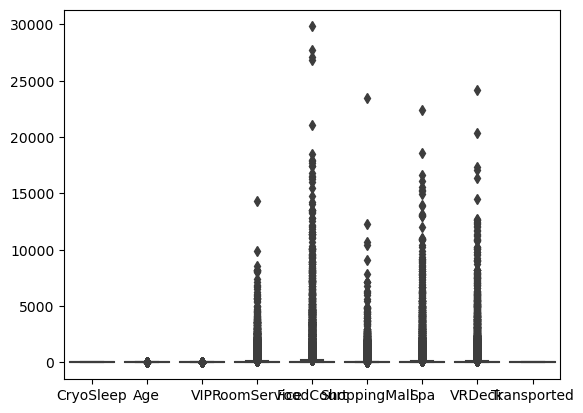

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
# f, ax = plt.subplots(1,2, figsize = (22,15))
# sns.barplot(data=df,y='Transported',x='HomePlanet')
# sns.barplot(data=df,y='Transported',x='CryoSleep')
# sns.boxplot(data=df)

# plt.legend()
plt.show()

In [106]:
duplicate_rows_df = df[df.duplicated()]
print(df.shape)
print("number of duplicate rows: ", duplicate_rows_df.shape)

(8693, 14)
number of duplicate rows:  (0, 14)


In [120]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<AxesSubplot:xlabel='Age'>

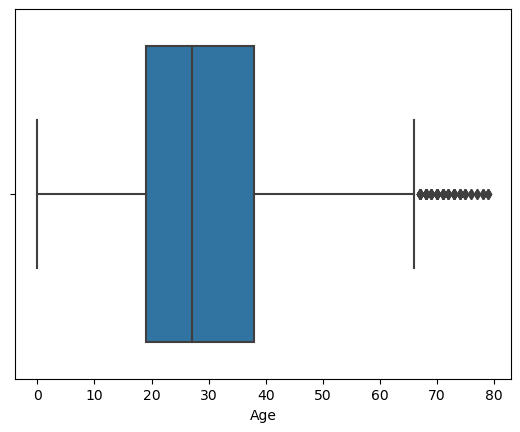

In [122]:
sns.boxplot(x=df['Age'])

In [128]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)

print(IQR)


Age            19.00
RoomService     0.00
FoodCourt       0.00
ShoppingMall    0.00
Spa             0.00
VRDeck          0.00
Transported     0.00
Name: 0.25, dtype: float64
Age            38.00
RoomService    47.00
FoodCourt      76.00
ShoppingMall   27.00
Spa            59.00
VRDeck         46.00
Transported     1.00
Name: 0.75, dtype: float64
Age            19.00
RoomService    47.00
FoodCourt      76.00
ShoppingMall   27.00
Spa            59.00
VRDeck         46.00
Transported     1.00
dtype: float64


<AxesSubplot:>

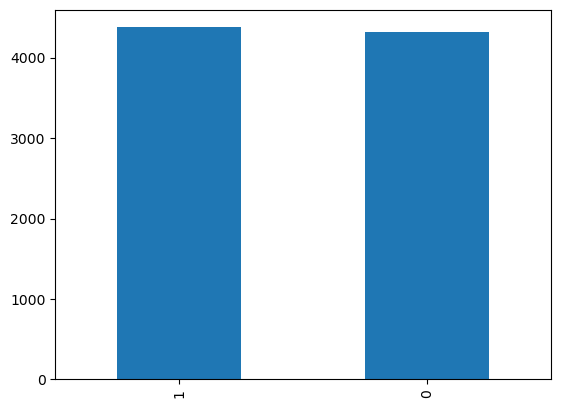

In [134]:
df.Transported.value_counts().plot(kind='bar')

<AxesSubplot:>

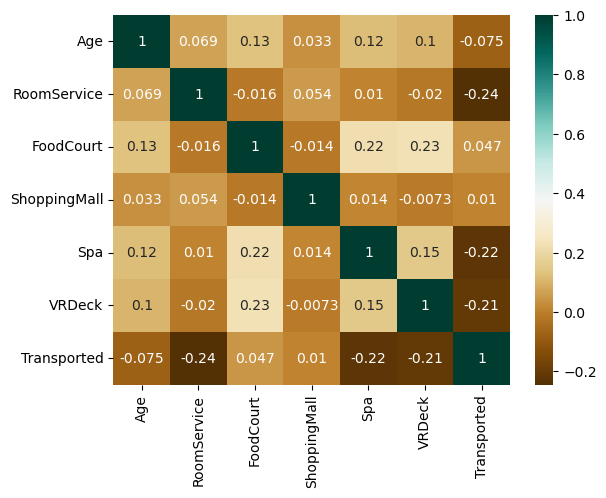

In [135]:
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

In [221]:
def featureTrans(X):
    X['Age']=np.log1p(X['Age'])
    X['Extras']=np.sum(X[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']],axis=1)
    X[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Extras']]=np.log1p(X[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Extras']])
    split_cabin = X['Cabin'].str.split('/', expand=True)
    X['c1'] = split_cabin[0]
    # df1['c2'] = split_cabin[1]
    X['c3'] = split_cabin[2]
    X.drop('Cabin',axis=1,inplace=True)
    X['p1']=X.PassengerId.str.split('_',expand=True)[1]
    X.drop('PassengerId',axis=1,inplace=True)
    X.drop('Name',axis=1,inplace=True)
    return X

In [224]:
df_test=featureTrans(df_test)
df_test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Extras,c1,c3,p1
0,Earth,True,TRAPPIST-1e,3.33,False,0.00,0.00,0.00,0.00,0.00,0.00,G,S,01
1,Earth,False,TRAPPIST-1e,3.00,False,0.00,2.30,0.00,7.95,0.00,7.95,F,S,01
2,Europa,True,55 Cancri e,3.47,False,0.00,0.00,0.00,0.00,0.00,0.00,C,S,01
3,Europa,False,TRAPPIST-1e,3.66,False,0.00,8.80,0.00,5.20,6.37,8.91,C,S,01
4,Earth,False,TRAPPIST-1e,3.04,False,2.40,0.00,6.46,0.00,0.00,6.47,F,S,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,3.56,False,0.00,0.00,0.00,0.00,0.00,0.00,G,S,02
4273,Earth,False,TRAPPIST-1e,3.76,False,0.00,6.74,2.89,2.40,4.98,6.93,NaN,NaN,01
4274,Mars,True,55 Cancri e,NaN,False,0.00,0.00,0.00,0.00,0.00,0.00,D,P,01
4275,Europa,False,NaN,NaN,False,0.00,7.89,0.00,0.00,6.26,8.07,D,P,01


In [258]:
df=pd.read_csv('spaceship-titanic/train.csv')
df_test=pd.read_csv('spaceship-titanic/test.csv')

In [261]:
df=featureTrans(df)
df_test=featureTrans(df_test)

In [262]:
print(df.shape)
print(df_test.shape)

(8693, 15)
(4277, 14)


In [235]:
cols_with_missing = [col for col in df.columns
                     if df[col].isnull().any()]
cols_with_missing

['HomePlanet',
 'CryoSleep',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'c1',
 'c3']

In [240]:
from sklearn.model_selection import train_test_split
y = df.Transported
X = df.drop(['Transported'], axis=1)
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and  X_train_full[cname].dtype == "object"]
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [241]:
X_train

,HomePlanet,CryoSleep,Destination,VIP,c1,c3,p1,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Extras
4278,Europa,False,55 Cancri e,False,C,S,01,4.01,0.00,6.33,0.00,9.63,7.94,9.83
5971,Earth,False,TRAPPIST-1e,False,F,P,01,3.04,0.00,3.04,0.69,6.55,0.00,6.58
464,Mars,False,TRAPPIST-1e,False,F,S,02,3.78,7.51,0.00,3.87,3.40,0.00,7.55
4475,Earth,False,TRAPPIST-1e,False,F,S,01,3.22,5.23,0.00,6.17,7.50,3.99,7.83
8469,Europa,True,55 Cancri e,False,C,S,01,3.26,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,Europa,True,55 Cancri e,False,B,P,01,3.50,0.00,0.00,0.00,0.00,0.00,0.00
7891,Earth,False,TRAPPIST-1e,False,F,S,01,3.14,0.00,0.00,1.95,0.00,6.60,6.61
4859,Mars,False,TRAPPIST-1e,False,E,S,01,3.40,6.26,0.00,3.09,1.61,6.70,7.22
3264,Earth,False,TRAPPIST-1e,False,G,P,04,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [242]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

numerical_transformer = SimpleImputer(strategy='mean')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [243]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)

In [244]:
from sklearn.metrics import mean_absolute_error

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

In [252]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

In [249]:
# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 0.20874065554916618


In [253]:
preds

array([False,  True, False, ...,  True, False, False])

In [247]:
y_valid=y_valid.astype(int)
y_valid

3601    1
6057    1
2797    0
7110    0
8579    1
       ..
864     0
3780    0
6046    1
170     0
2519    1
Name: Transported, Length: 1739, dtype: int64

In [263]:
preds = my_pipeline.predict(df_test)

In [264]:
preds=preds.astype(int)

In [267]:
len(preds)

4277

In [270]:
df_test=pd.read_csv('spaceship-titanic/test.csv')

In [272]:
df_test.head()
len(preds)

4277

In [273]:
make_sub(pred_y=preds,sub_data=df_test,name='r41')


100%|██████████| 58.5k/58.5k [00:00<00:00, 72.9kB/s]


Successfully submitted to Spaceship Titanicsuccesully saved - r41
